# Logistic Regression - Breast Cancer

參考文章：
- [machine learning 下的 Logistic Regression 實作](https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-logistic-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-d19b971ff9dc)
- [YouTube印度人講程式](https://youtu.be/1nWFHa6K23w) (Python2)
- 超詳細 [Understanding Logistic Regression in Python](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)

Logistic Regression的function, 它是用sigmoid function來計算, output出來如果>0.5,就會屬於target1, 而如果<0.5, 就會屬於target0。

其實程式只要把`linear_model.LinearRegression()`改成`linear_model.LogisticRegression(solver = 'liblinear')`就好了

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
# Load the BreastCancer dataset
df =  pd.read_csv('BreastCancer.csv')
# Label of data > y
breastCancer_y = df['diagnosis'].values

# Training data > X
breastCancer_X = df.iloc[:,1:]
breastCancer_X = breastCancer_X.values

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train the LR model & Do predict

In [3]:
# Create linear regression object
logreg = linear_model.LogisticRegression(solver = 'liblinear')

# Train the model using the training sets
logreg.fit(breastCancer_X, breastCancer_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
# Make predictions using the testing set = training sets
breastCancer_y_pred = logreg.predict(breastCancer_X)

## Reveal Results

In [5]:
logreg.classes_

array([0, 1], dtype=int64)

In [6]:
logreg.score(breastCancer_X, breastCancer_y)

0.9595782073813708

In [7]:
np.set_printoptions(precision=4, suppress=True)

# The coefficients 各項的係數/權重，有30個
print('Coefficients: \n', logreg.coef_)
# The intercept 截距
print('Intercept: ', logreg.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(breastCancer_y, breastCancer_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Score: %.2f'
      % logreg.score(breastCancer_X, breastCancer_y))

Coefficients: 
 [[ 2.1115  0.1205 -0.0597 -0.0035 -0.1548 -0.4044 -0.648  -0.342  -0.2262
  -0.0262 -0.0253  1.253   0.0021 -0.0948 -0.017   0.0046 -0.0486 -0.0404
  -0.0426  0.0063  1.2468 -0.3461 -0.1245 -0.0241 -0.2869 -1.1452 -1.5953
  -0.659  -0.6965 -0.1153]]
Intercept:  [0.395]
Mean squared error: 0.04
Score: 0.96


### Confusion Matrix & Visualize

In [8]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(breastCancer_y, breastCancer_y_pred)
cnf_matrix

array([[198,  14],
       [  9, 348]], dtype=int64)

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

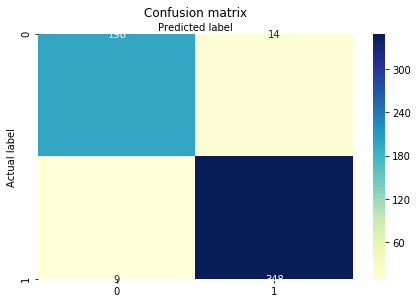

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')